In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from Modules.HelperFunctions import *
import pandas as pd

# CONSTANTS
from pathlib import Path
import csv
# Get the directory of the current file
current_dir = Path().cwd()
output_dir = current_dir.parent/'output'


# Part I

## BoxPlots

In [10]:
LinReg_nested = np.genfromtxt(output_dir/'IDB_results_p1/LinReg.csv')
LogReg_nested = np.genfromtxt(output_dir/'IDB_results_p1/LogReg.csv')
BCE_nested = np.genfromtxt(output_dir/'IDB_results_p1/NNBCE.csv')
MRLoss_nested = np.genfromtxt(output_dir/'IDB_results_p1/NNMR.csv')

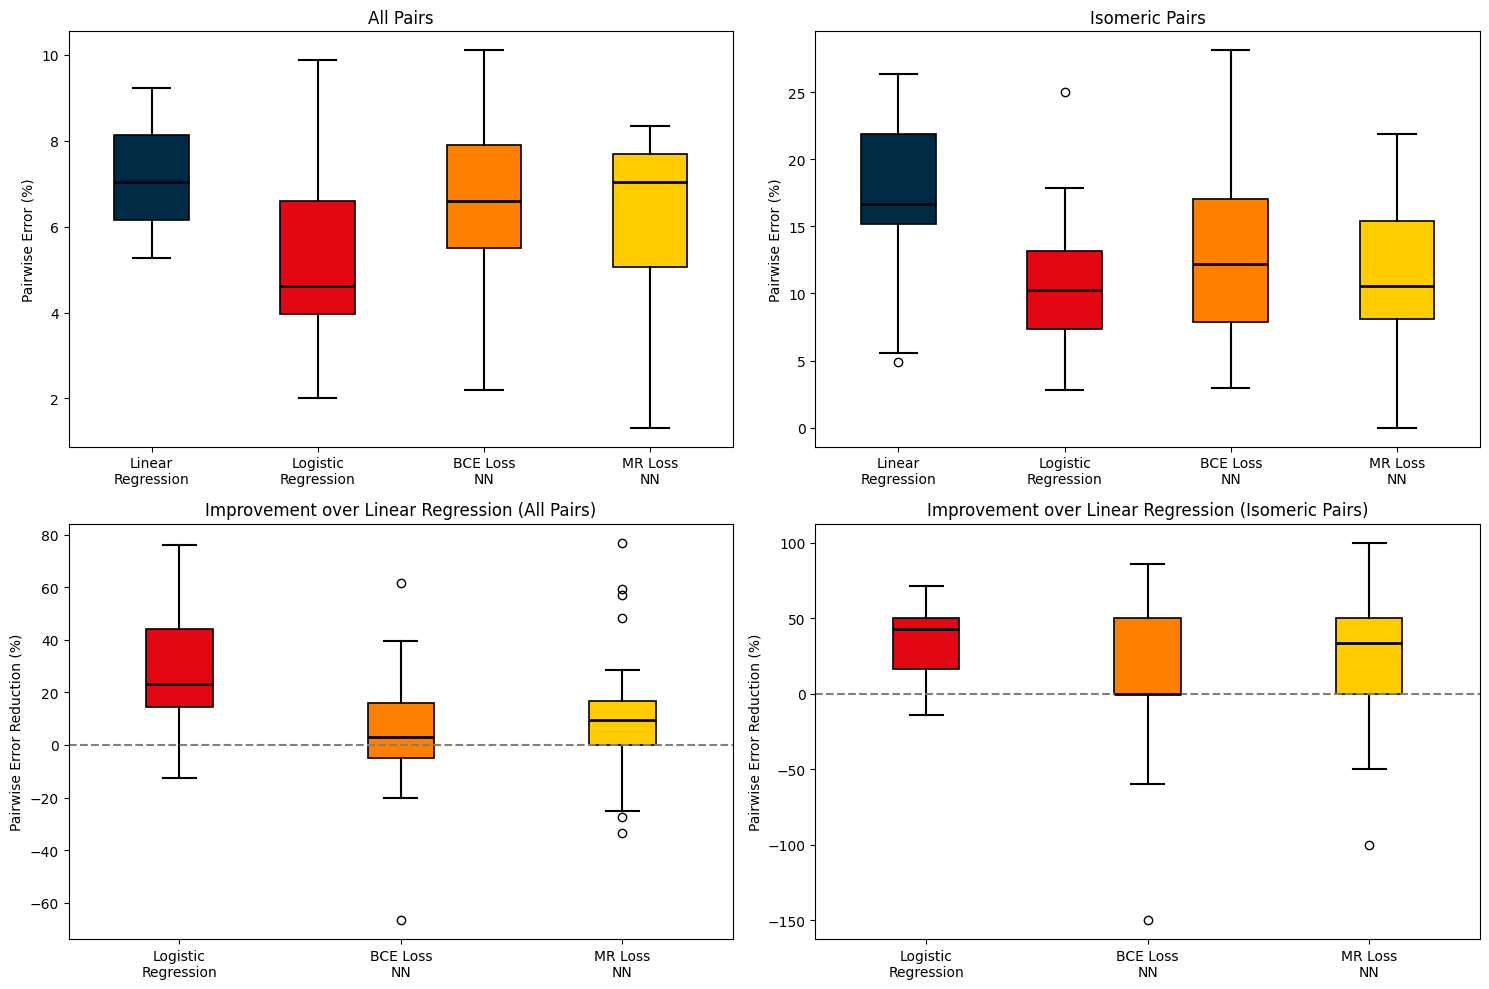

In [11]:
# Setup model names and colors
model_names_all = ['Linear\nRegression', 'Logistic\nRegression', 'BCE Loss\nNN', 'MR Loss\nNN']
colors_all = ['#002b45', '#e30613', '#ff7f00', '#ffcc00']

model_names_sub = ['Logistic\nRegression', 'BCE Loss\nNN', 'MR Loss\nNN']
colors_sub = ['#e30613', '#ff7f00', '#ffcc00']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: All Pairs (raw PER)
i = 1
PER_data1 = [LinReg_nested[:, i]*100, LogReg_nested[:, i]*100, BCE_nested[:, i]*100, MRLoss_nested[:, i]*100]
box1 = axes[0, 0].boxplot(PER_data1, patch_artist=True)
for patch, color in zip(box1['boxes'], colors_all):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)
for median in box1['medians']:
    median.set_color('black')
    median.set_linewidth(2)
for whisker in box1['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.5)
for cap in box1['caps']:
    cap.set_color('black')
    cap.set_linewidth(1.5)
axes[0, 0].set_title('All Pairs')
axes[0, 0].set_ylabel('Pairwise Error (%)')
axes[0, 0].set_xticks(np.arange(1, len(model_names_all) + 1))
axes[0, 0].set_xticklabels(model_names_all)

# Plot 2: Isomeric Pairs (raw PER *100)
i = 3
PER_data2 = [LinReg_nested[:, i]*100, LogReg_nested[:, i]*100, BCE_nested[:, i]*100, MRLoss_nested[:, i]*100]
box2 = axes[0, 1].boxplot(PER_data2, patch_artist=True)
for patch, color in zip(box2['boxes'], colors_all):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)
for median in box2['medians']:
    median.set_color('black')
    median.set_linewidth(2)
for whisker in box2['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.5)
for cap in box2['caps']:
    cap.set_color('black')
    cap.set_linewidth(1.5)
axes[0, 1].set_title('Isomeric Pairs')
axes[0, 1].set_ylabel('Pairwise Error (%)')
axes[0, 1].set_xticks(np.arange(1, len(model_names_all) + 1))
axes[0, 1].set_xticklabels(model_names_all)

# Plot 3: Improvement vs Linear Regression (All Pairs)
i = 1
baseline = LinReg_nested[:, i]
PER_data3 = [
    100 * (baseline - LogReg_nested[:, i]) / baseline,
    100 * (baseline - BCE_nested[:, i]) / baseline,
    100 * (baseline - MRLoss_nested[:, i]) / baseline,
]
box3 = axes[1, 0].boxplot(PER_data3, patch_artist=True)
for patch, color in zip(box3['boxes'], colors_sub):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)
for median in box3['medians']:
    median.set_color('black')
    median.set_linewidth(2)
for whisker in box3['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.5)
for cap in box3['caps']:
    cap.set_color('black')
    cap.set_linewidth(1.5)
axes[1, 0].axhline(0, linestyle='--', color='gray', linewidth=1.5)
axes[1, 0].set_title('Improvement over Linear Regression (All Pairs)')
axes[1, 0].set_ylabel('Pairwise Error Reduction (%)')
axes[1, 0].set_xticks(np.arange(1, len(model_names_sub) + 1))
axes[1, 0].set_xticklabels(model_names_sub)

# Plot 4: Improvement vs Linear Regression (Isomeric Pairs)
i = 3
baseline = LinReg_nested[:, i]
PER_data4 = [
    100 * (baseline - LogReg_nested[:, i]) / baseline,
    100 * (baseline - BCE_nested[:, i]) / baseline,
    100 * (baseline - MRLoss_nested[:, i]) / baseline,
]
box4 = axes[1, 1].boxplot(PER_data4, patch_artist=True)
for patch, color in zip(box4['boxes'], colors_sub):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.2)
for median in box4['medians']:
    median.set_color('black')
    median.set_linewidth(2)
for whisker in box4['whiskers']:
    whisker.set_color('black')
    whisker.set_linewidth(1.5)
for cap in box4['caps']:
    cap.set_color('black')
    cap.set_linewidth(1.5)
axes[1, 1].axhline(0, linestyle='--', color='gray', linewidth=1.5)
axes[1, 1].set_title('Improvement over Linear Regression (Isomeric Pairs)')
axes[1, 1].set_ylabel('Pairwise Error Reduction (%)')
axes[1, 1].set_xticks(np.arange(1, len(model_names_sub) + 1))
axes[1, 1].set_xticklabels(model_names_sub)

plt.tight_layout()
plt.show()
fig.savefig("BoxPlots.png", dpi=600, bbox_inches='tight')

## Actual values

### Linear Regression

In [12]:
# Unweighted metrics (PER)
PER_test_mean, PER_test_std = np.mean(LinReg_nested[:, 0]), np.std(LinReg_nested[:, 0],ddof=1) #/ np.sqrt(len(LinReg_nested[:, 0])) * 1.96
PER_mixed_mean, PER_mixed_std = np.mean(LinReg_nested[:, 1]), np.std(LinReg_nested[:, 1],ddof=1) #/ np.sqrt(len(LinReg_nested[:, 1])) * 1.96

# Weighted metrics (iPER)
iPER_test_mean, iPER_test_ci = weighted_stats(LinReg_nested[:, 2], LinReg_nested[:, 4])
iPER_mixed_mean, iPER_mixed_ci = weighted_stats(LinReg_nested[:, 3], LinReg_nested[:, 5])

# Format for printing (in %)
results = {
    "PER (test)": format_result(PER_test_mean * 100, PER_test_std * 100),
    "PER (mixed)": format_result(PER_mixed_mean * 100, PER_mixed_std * 100),
    "iPER (test)": format_result(iPER_test_mean * 100, iPER_test_ci * 100),
    "iPER (mixed)": format_result(iPER_mixed_mean * 100, iPER_mixed_ci * 100)
}

# Print results
print("Evaluation Results (mean ± std):")
for name, value in results.items():
    print(f"{name:15s}: {value}")

Evaluation Results (mean ± std):
PER (test)     : 7.9 ± 2.9
PER (mixed)    : 7.1 ± 1.2
iPER (test)    : 21.0 ± 25.0
iPER (mixed)   : 16.7 ± 5.8


### Logistic Regression

In [13]:
# Unweighted metrics (PER)
PER_test_mean, PER_test_std = np.mean(LogReg_nested[:, 0]), np.std(LogReg_nested[:, 0],ddof=1) #/ np.sqrt(len(LogReg_nested[:, 0])) * 1.96
PER_mixed_mean, PER_mixed_std = np.mean(LogReg_nested[:, 1]), np.std(LogReg_nested[:, 1],ddof=1)# / np.sqrt(len(LogReg_nested[:, 1])) * 1.96

# Weighted metrics (iPER)
iPER_test_mean, iPER_test_ci = weighted_stats(LogReg_nested[:, 2], LogReg_nested[:, 4])
iPER_mixed_mean, iPER_mixed_ci = weighted_stats(LogReg_nested[:, 3], LogReg_nested[:, 5])

# Format for printing (in %)
results = {
    "PER (test)": format_result(PER_test_mean * 100, PER_test_std * 100),
    "PER (mixed)": format_result(PER_mixed_mean * 100, PER_mixed_std * 100),
    "iPER (test)": format_result(iPER_test_mean * 100, iPER_test_ci * 100),
    "iPER (mixed)": format_result(iPER_mixed_mean * 100, iPER_mixed_ci * 100)
}

# Print results
print("Evaluation Results (mean ± std):")
for name, value in results.items():
    print(f"{name:15s}: {value}")

Evaluation Results (mean ± std):
PER (test)     : 6.6 ± 4.0
PER (mixed)    : 5.3 ± 2.0
iPER (test)    : 21.0 ± 22.0
iPER (mixed)   : 10.5 ± 4.8


### RankNET (BCELoss)

In [14]:
# Unweighted metrics (PER)
PER_test_mean, PER_test_std = np.mean(BCE_nested[:, 0]), np.std(BCE_nested[:, 0],ddof=1)# / np.sqrt(len(BCE_nested[:, 0])) * 1.96
PER_mixed_mean, PER_mixed_std = np.mean(BCE_nested[:, 1]), np.std(BCE_nested[:, 1],ddof=1)# / np.sqrt(len(BCE_nested[:, 1])) * 1.96

# Weighted metrics (iPER)
iPER_test_mean, iPER_test_ci = weighted_stats(BCE_nested[:, 2], BCE_nested[:, 4])
iPER_mixed_mean, iPER_mixed_ci = weighted_stats(BCE_nested[:, 3], BCE_nested[:, 5])

# Format for printing (in %)
results = {
    "PER (test)": format_result(PER_test_mean * 100, PER_test_std * 100),
    "PER (mixed)": format_result(PER_mixed_mean * 100, PER_mixed_std * 100),
    "iPER (test)": format_result(iPER_test_mean * 100, iPER_test_ci * 100),
    "iPER (mixed)": format_result(iPER_mixed_mean * 100, iPER_mixed_ci * 100)
}

# Print results
print("Evaluation Results (mean ± std):")
for name, value in results.items():
    print(f"{name:15s}: {value}")

Evaluation Results (mean ± std):
PER (test)     : 7.5 ± 5.0
PER (mixed)    : 6.7 ± 1.9
iPER (test)    : 21.0 ± 27.0
iPER (mixed)   : 12.7 ± 6.4


### RankNET (MRLoss)

In [16]:
# Unweighted metrics (PER)
PER_test_mean, PER_test_std = np.mean(MRLoss_nested[:, 0]), np.std(MRLoss_nested[:, 0],ddof=1)
PER_mixed_mean, PER_mixed_std = np.mean(MRLoss_nested[:, 1]), np.std(MRLoss_nested[:, 1],ddof=1)

# Weighted metrics (iPER)
iPER_test_mean, iPER_test_ci = weighted_stats(MRLoss_nested[:, 2], MRLoss_nested[:, 4])
iPER_mixed_mean, iPER_mixed_ci = weighted_stats(MRLoss_nested[:, 3], MRLoss_nested[:, 5])

# Format for printing (in %)
results = {
    "PER (test)": format_result(PER_test_mean * 100, PER_test_std * 100),
    "PER (mixed)": format_result(PER_mixed_mean * 100, PER_mixed_std * 100),
    "iPER (test)": format_result(iPER_test_mean * 100, iPER_test_ci * 100),
    "iPER (mixed)": format_result(iPER_mixed_mean * 100, iPER_mixed_ci * 100)
}

# Print results
print("Evaluation Results (mean ± 95% CI):")
for name, value in results.items():
    print(f"{name:15s}: {value}")

Evaluation Results (mean ± 95% CI):
PER (test)     : 7.9 ± 4.6
PER (mixed)    : 6.2 ± 2.0
iPER (test)    : 23.0 ± 22.0
iPER (mixed)   : 11.5 ± 5.4


## Error distribution

In [17]:

def plot_rel_diff_error_distribution_tile_from_dfs(dfs, labels, bin_edges=None, isomeric_only=None, title_suffix=""):
    """
    Plots a 2x2 tile of error vs rel_diff histograms + error rate line, using pandas DataFrames.

    Parameters:
    - dfs: list of 4 pandas DataFrames with 'rel_diff', 'error', and 'is_isomer' columns
    - labels: list of 4 string labels (one for each plot)
    - bin_edges: np.array of bin edges (optional); default: np.linspace(0, 2.0, 21)
    - isomeric_only: True (only isomeric), False (non-isomeric), None (all)
    - title_suffix: string appended to each plot title
    """
    if len(dfs) != 4 or len(labels) != 4:
        raise ValueError("You must provide exactly 4 DataFrames and 4 labels")

    if bin_edges is None:
        bin_edges = np.linspace(0, 2.0, 21)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    width = (bin_edges[1] - bin_edges[0]) * 0.9

    fig, axs = plt.subplots(2, 2, figsize=(16, 12), sharex=True, sharey=True)

    for idx, (df, label) in enumerate(zip(dfs, labels)):
        # Filter rows based on isomeric flag
        if isomeric_only is True:
            df_filtered = df[df['is_isomer'] == 1]
            group_label = "Isomeric Pairs"
        elif isomeric_only is False:
            df_filtered = df[df['is_isomer'] == 0]
            group_label = "Non-Isomeric Pairs"
        else:
            df_filtered = df
            group_label = "All Pairs"

        rel_diff = df_filtered['rel_diff'].values
        errors = df_filtered['error'].astype(bool).values

        # Histogram calculations
        total_counts, _ = np.histogram(rel_diff, bins=bin_edges)
        error_counts, _ = np.histogram(rel_diff[errors], bins=bin_edges)
        error_rate = np.divide(error_counts, total_counts, out=np.zeros_like(error_counts, dtype=float), where=total_counts > 0) * 100

        ax = axs[idx // 2, idx % 2]
        ax2 = ax.twinx()

        # Plot total and error counts as bars
        ax.bar(bin_centers, total_counts, width=width, color='#d7ebf2', label='Total Pairs')
        ax.bar(bin_centers, error_counts, width=width, color='#dc3041', label='Error Pairs')

        # Plot error rate as dashed line
        ax2.plot(bin_centers, error_rate, color='black', linestyle='--', marker='o', linewidth=2, label='Error Rate (%)')

        # Labels and title
        ax.set_title(f"{label} [{group_label}]{title_suffix}")
        ax.set_xlabel('α - 1')
        ax.set_ylabel('Pair Count')
        ax2.set_ylabel('Error Rate (%)')
        ax2.set_ylim(0, 100)

        # Legends
        h1, l1 = ax.get_legend_handles_labels()
        h2, l2 = ax2.get_legend_handles_labels()
        ax.legend(h1 + h2, l1 + l2, loc='upper right')

    plt.tight_layout()
    plt.savefig("IsomericPairs.png")
    plt.show()

In [20]:
lin = pd.read_csv(output_dir/'Accumulators_IDB'/'LinReg.csv')
log92 = pd.read_csv(output_dir/'Accumulators_IDB'/'Log92.csv')
BCE = pd.read_csv(output_dir/'Accumulators_IDB'/'NNBCE.csv')
MR = pd.read_csv(output_dir/'Accumulators_IDB'/'NNMR.csv')
d_sets = [lin,log92,BCE,MR]

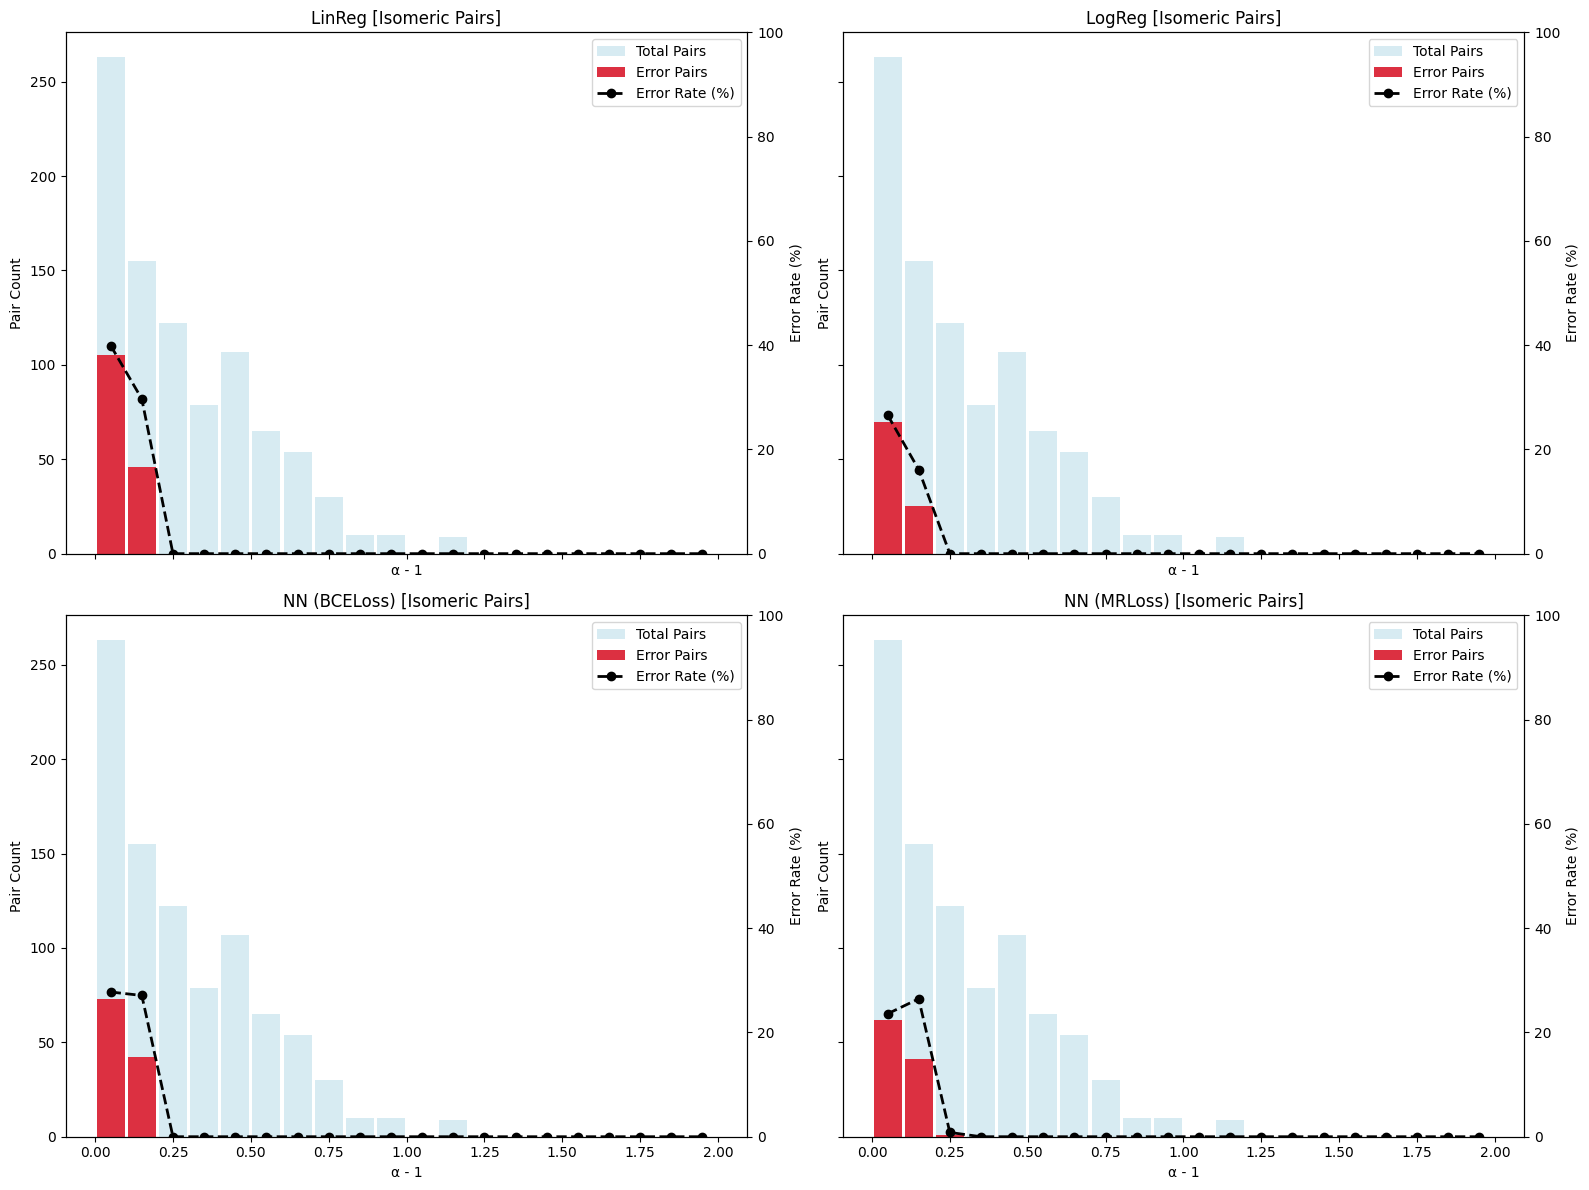

In [25]:
plot_rel_diff_error_distribution_tile_from_dfs(d_sets,['LinReg','LogReg','NN (BCELoss)','NN (MRLoss)'],isomeric_only=True,bin_edges=np.linspace(0, 2.0, 21))

## Statistical tests

In [129]:
from scipy.stats import friedmanchisquare
LinReg_nested = np.genfromtxt(output_dir/'IDB_results_p1/LinReg.csv')
LogReg_nested = np.genfromtxt(output_dir/'IDB_results_p1/LogReg.csv')
BCE_nested = np.genfromtxt(output_dir/'IDB_results_p1/NNBCE.csv')
MRLoss_nested = np.genfromtxt(output_dir/'IDB_results_p1/NNMR.csv')

i = 3
scores = {'LinReg':LinReg_nested[:,i].reshape(-1),'LogReg':LogReg_nested[:,i].reshape(-1),'NNBCE':BCE_nested[:,i].reshape(-1),'NNMR':MRLoss_nested[:,i].reshape(-1)}
df = pd.DataFrame(scores)

stat, p = friedmanchisquare(scores['LinReg'],scores['LogReg'],scores['NNBCE'],scores['NNMR'])
p

0.004636605438041686

In [130]:
from scipy.stats import wilcoxon
import itertools
import statsmodels.stats.multitest as smm

pairs = list(itertools.combinations(df.columns, 2))
pvals = []

for m1, m2 in pairs:
    stat, p = wilcoxon(df[m1], df[m2])
    pvals.append(p)

# Holm correction for multiple testing
reject, pvals_corrected, _, _ = smm.multipletests(pvals, method="holm")

for (m1, m2), p_corr, rej in zip(pairs, pvals_corrected, reject):
    print(f"{m1} vs {m2}: corrected p={p_corr:.4f}, significant={rej}")


LinReg vs LogReg: corrected p=0.0007, significant=True
LinReg vs NNBCE: corrected p=0.3406, significant=False
LinReg vs NNMR: corrected p=0.0178, significant=True
LogReg vs NNBCE: corrected p=0.6006, significant=False
LogReg vs NNMR: corrected p=0.6006, significant=False
NNBCE vs NNMR: corrected p=0.6006, significant=False


# Part II 

## BoxPlots

In [32]:
LogReg20 = np.genfromtxt(output_dir/'IDB_results_p2/Log20R2.csv')
LogReg92 = np.genfromtxt(output_dir/'IDB_results_p2/Log92R2.csv')
BCE = np.genfromtxt(output_dir/'IDB_results_p2/NNBCER2.csv')
MRLoss = np.genfromtxt(output_dir/'IDB_results_p2/NNMRR2.csv')

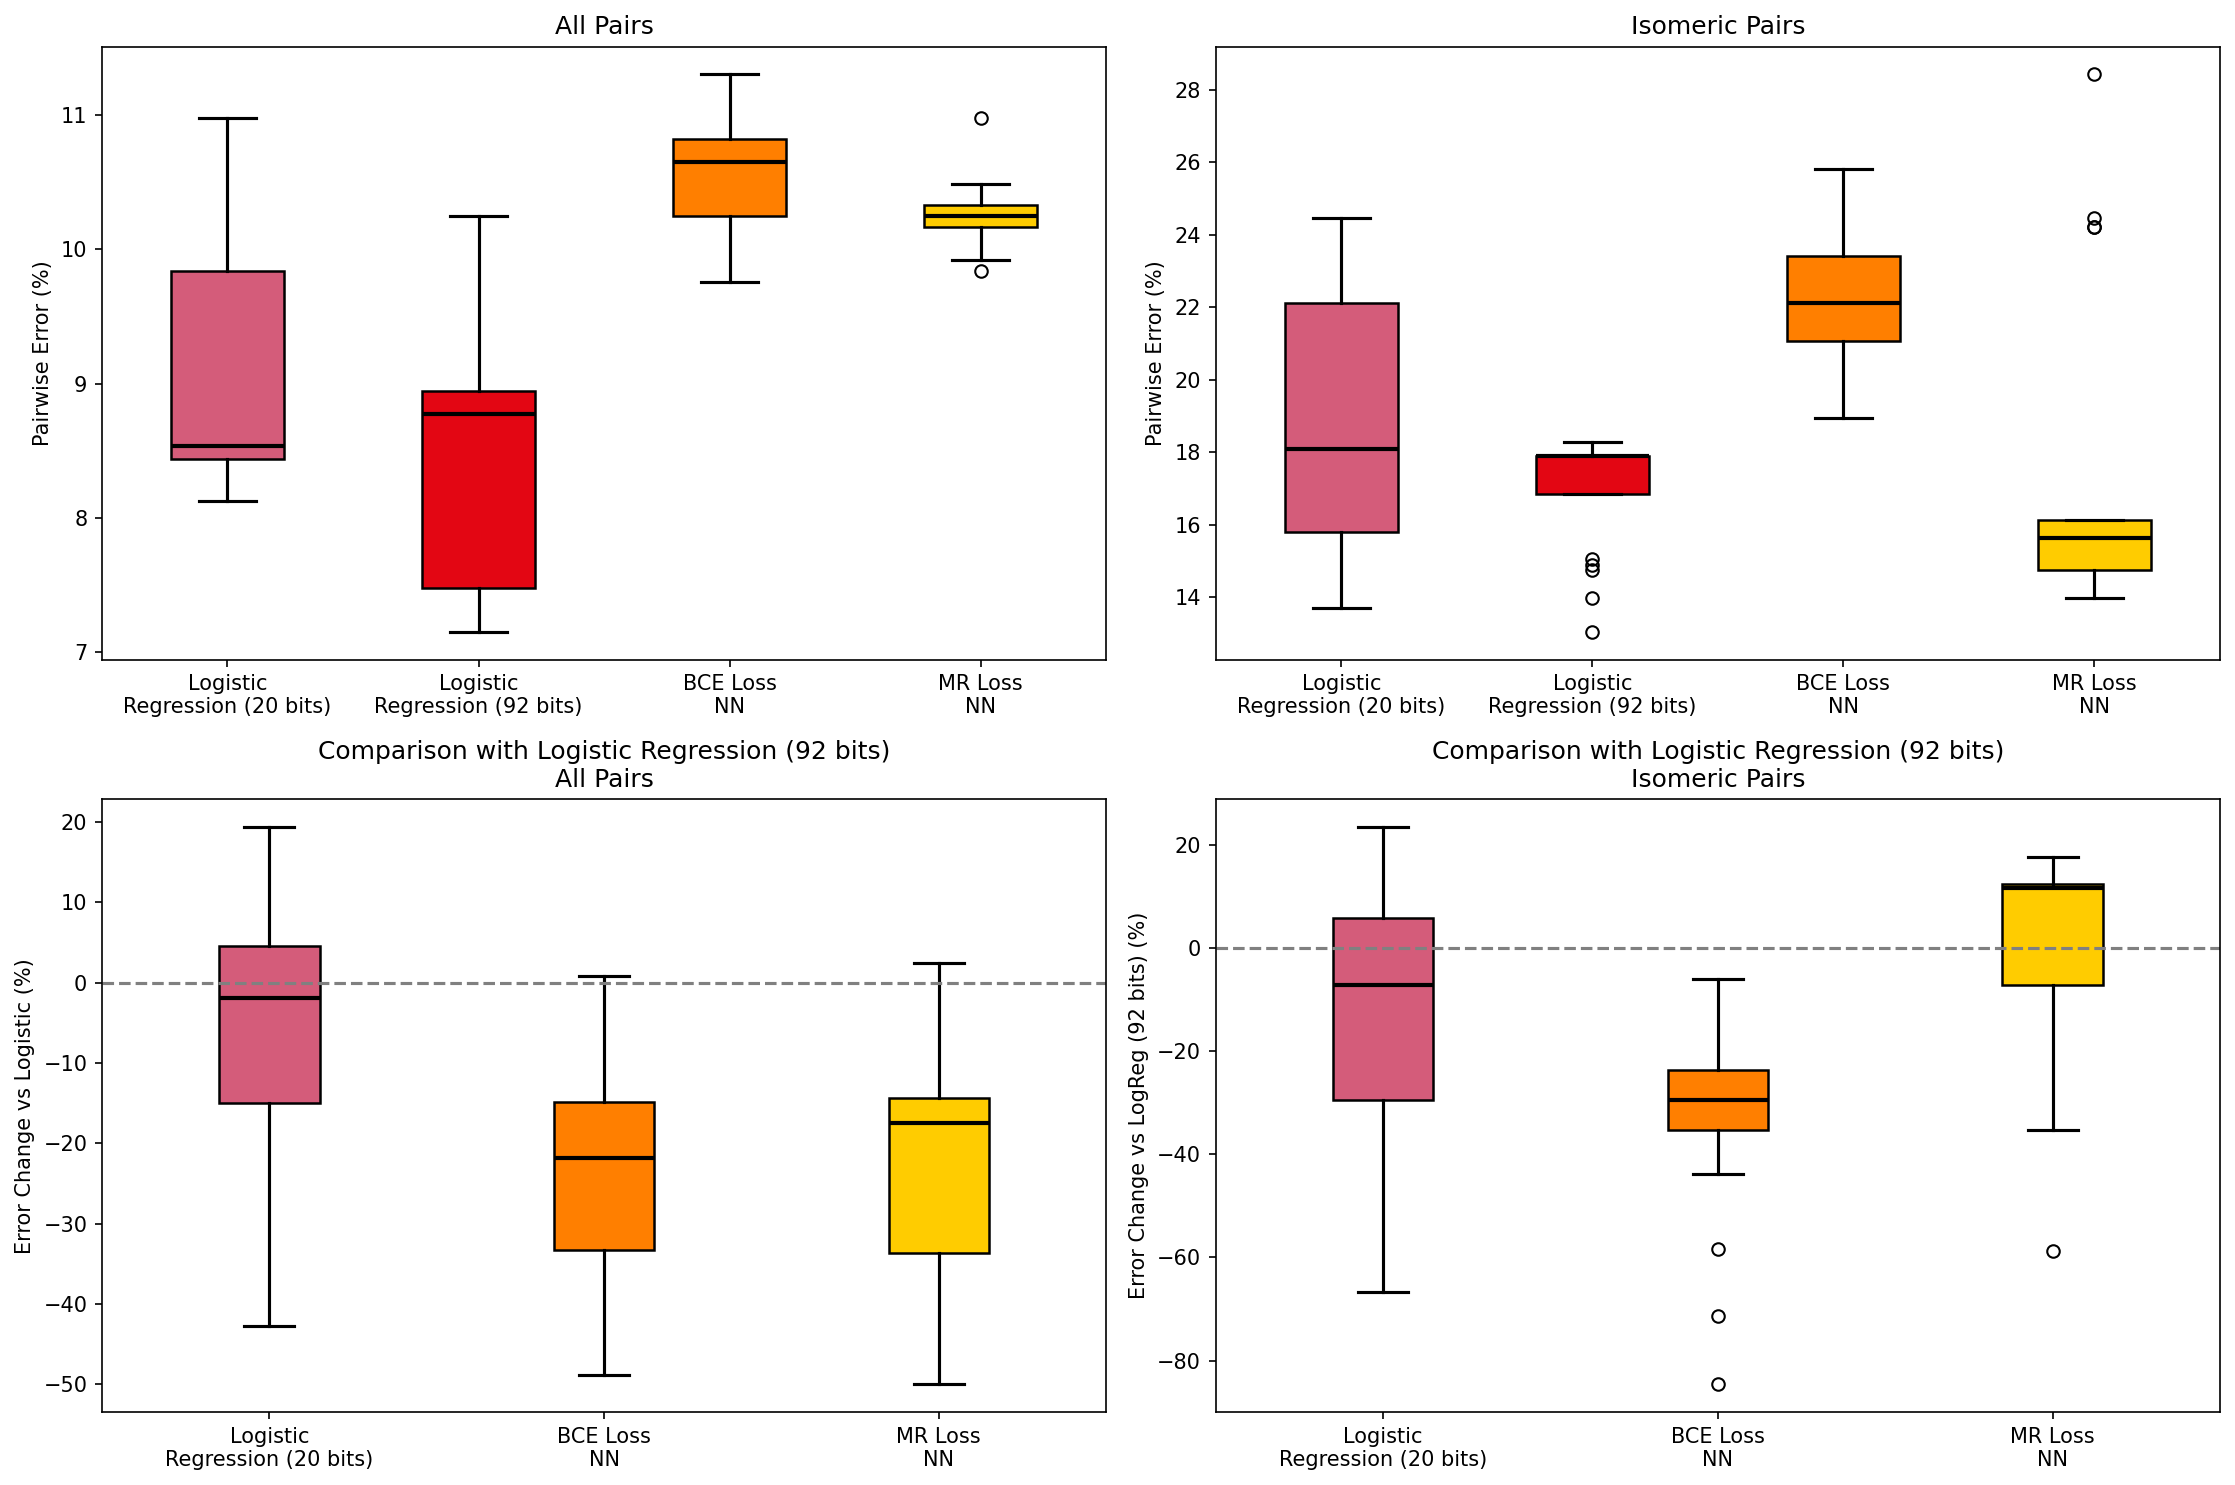

In [33]:
# Setup model names and colors
model_names_all = [
    'Logistic\nRegression (20 bits)',
    'Logistic\nRegression (92 bits)',
    'BCE Loss\nNN',
    'MR Loss\nNN'
]
colors_all = ['#d45c7a', '#e30613', '#ff7f00', '#ffcc00']

model_names_sub = ['Logistic\nRegression (20 bits)', 'BCE Loss\nNN', 'MR Loss\nNN']
colors_sub = ['#d45c7a', '#ff7f00', '#ffcc00']

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10), dpi=150)

def stylize_boxplot(boxplot, colors):
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)
        patch.set_edgecolor('black')
        patch.set_linewidth(1.2)
    for median in boxplot['medians']:
        median.set_color('black')
        median.set_linewidth(2)
    for whisker in boxplot['whiskers']:
        whisker.set_color('black')
        whisker.set_linewidth(1.5)
    for cap in boxplot['caps']:
        cap.set_color('black')
        cap.set_linewidth(1.5)

# --- Plot 1: All Pairs (PER * 100) ---
i = 1
PER_data1 = [LogReg20[:, i]*100, LogReg92[:, i]*100, BCE[:, i]*100, MRLoss[:, i]*100]
box1 = axes[0, 0].boxplot(PER_data1, patch_artist=True)
stylize_boxplot(box1, colors_all)
axes[0, 0].set_title('All Pairs')
axes[0, 0].set_ylabel('Pairwise Error (%)')
axes[0, 0].set_xticks(np.arange(1, len(model_names_all) + 1))
axes[0, 0].set_xticklabels(model_names_all)

# --- Plot 2: Isomeric Pairs (PER * 100) ---
i = 3
PER_data2 = [LogReg20[:, i]*100, LogReg92[:, i]*100, BCE[:, i]*100, MRLoss[:, i]*100]
box2 = axes[0, 1].boxplot(PER_data2, patch_artist=True)
stylize_boxplot(box2, colors_all)
axes[0, 1].set_title('Isomeric Pairs')
axes[0, 1].set_ylabel('Pairwise Error (%)')
axes[0, 1].set_xticks(np.arange(1, len(model_names_all) + 1))
axes[0, 1].set_xticklabels(model_names_all)

# --- Plot 3: Comparison to Logistic Regression (All Pairs) ---
i = 1
baseline = LogReg92[:, i]
PER_data3 = [
    100 * (baseline-LogReg20[:, i]) / baseline,
    100 * (baseline-BCE[:, i]) / baseline,
    100 * (baseline-MRLoss[:, i]) / baseline
]
box3 = axes[1, 0].boxplot(PER_data3, patch_artist=True)
stylize_boxplot(box3, colors_sub)
axes[1, 0].axhline(0, linestyle='--', color='gray', linewidth=1.5)
axes[1, 0].set_title('Comparison with Logistic Regression (92 bits)\nAll Pairs')
axes[1, 0].set_ylabel('Error Change vs Logistic (%)')
axes[1, 0].set_xticks(np.arange(1, len(model_names_sub) + 1))
axes[1, 0].set_xticklabels(model_names_sub)

# --- Plot 4: Comparison to Logistic Regression (Isomeric Pairs) ---
i = 3
baseline = LogReg92[:, i]
PER_data4 = [
    100 * (baseline-LogReg20[:, i]) / baseline,
    100 * (baseline-BCE[:, i]) / baseline,
    100 * (baseline-MRLoss[:, i]) / baseline
]
box4 = axes[1, 1].boxplot(PER_data4, patch_artist=True)
stylize_boxplot(box4, colors_sub)
axes[1, 1].axhline(0, linestyle='--', color='gray', linewidth=1.5)
axes[1, 1].set_title('Comparison with Logistic Regression (92 bits)\nIsomeric Pairs')
axes[1, 1].set_ylabel('Error Change vs LogReg (92 bits) (%)')
axes[1, 1].set_xticks(np.arange(1, len(model_names_sub) + 1))
axes[1, 1].set_xticklabels(model_names_sub)

plt.tight_layout()
plt.show()
fig.savefig("BoxPlots_vs_LogRegP2.png", dpi=600, bbox_inches='tight')


## Error distributions

In [39]:
log20 = pd.read_csv(output_dir/'Accumulators'/'Log20R2.csv')
log92 = pd.read_csv(output_dir/'Accumulators'/'Log92R2.csv')
BCE = pd.read_csv(output_dir/'Accumulators'/'NNBCER2.csv')
MR = pd.read_csv(output_dir/'Accumulators'/'NNMRR2.csv')
d_sets = [log20,log92,BCE,MR]

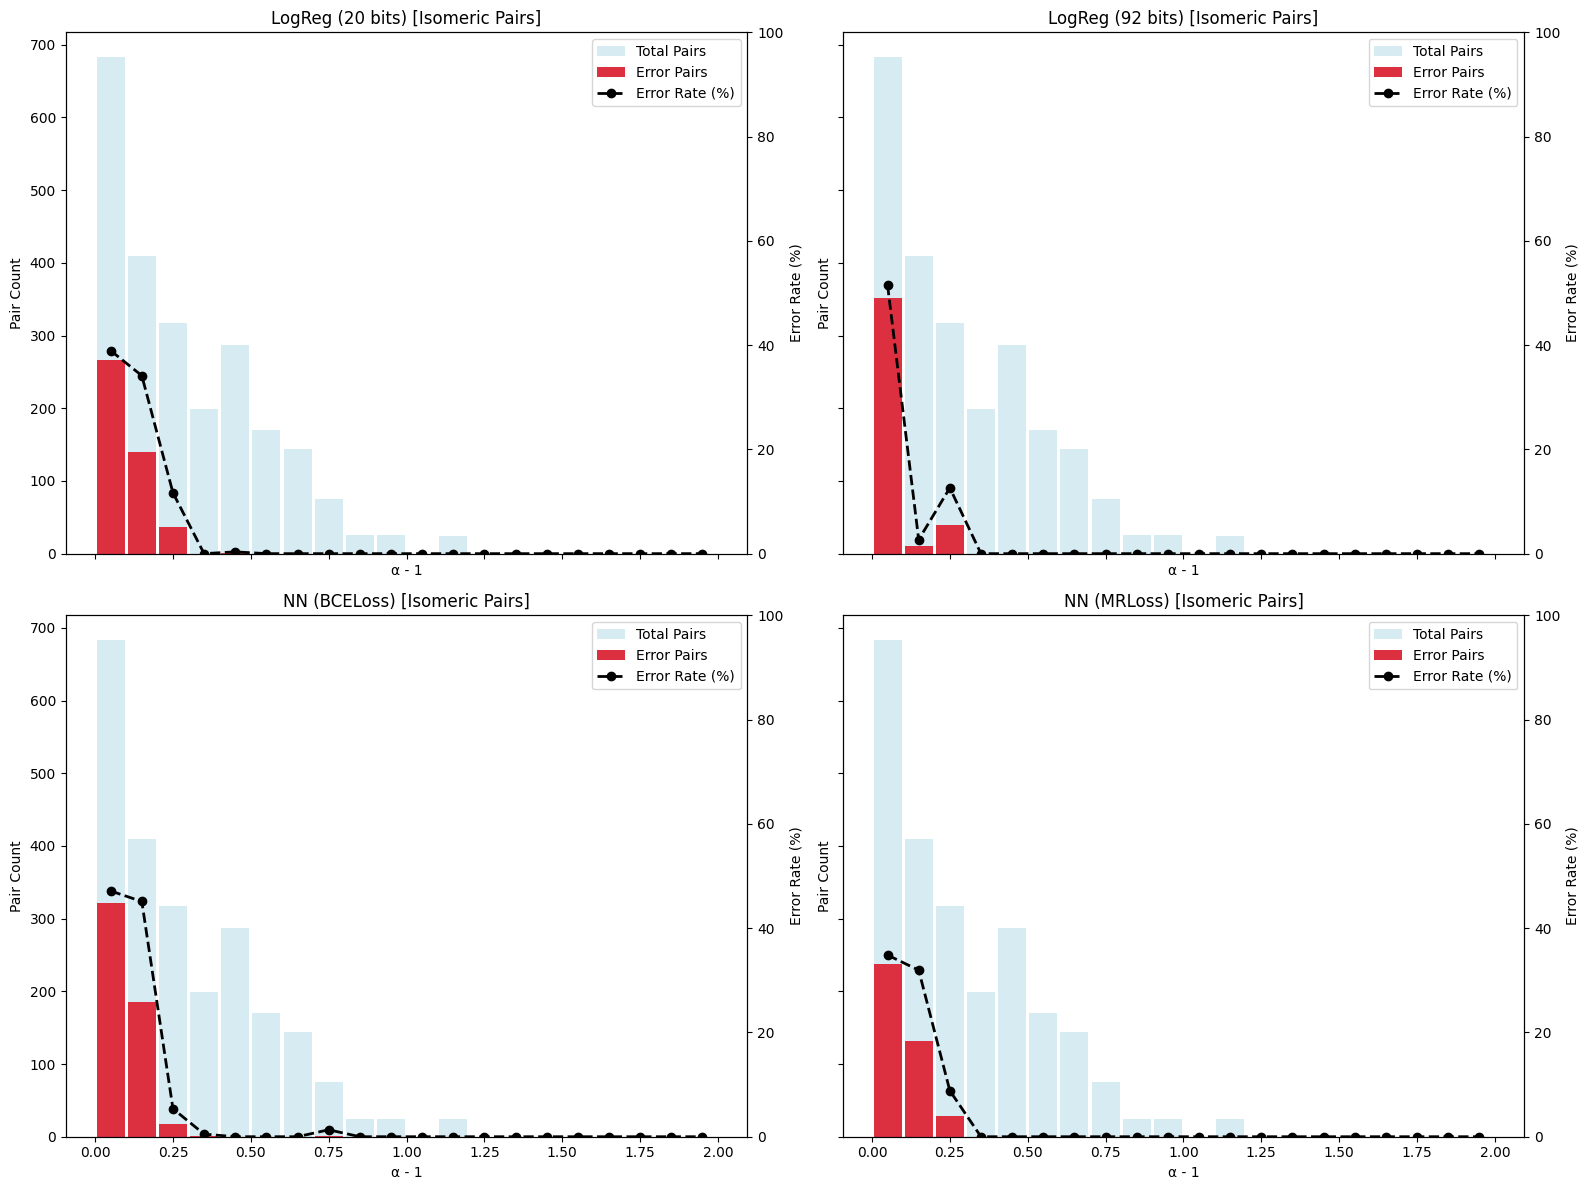

In [106]:
plot_rel_diff_error_distribution_tile_from_dfs(d_sets,['LogReg (20 bits)','LogReg (92 bits)','NN (BCELoss)','NN (MRLoss)'],isomeric_only=True,bin_edges=np.linspace(0, 2.0, 21))

## Statistical Tests

In [138]:
LogReg20 = np.genfromtxt(output_dir/'IDB_results_p2/Log20R2.csv')
LogReg92 = np.genfromtxt(output_dir/'IDB_results_p2/Log92R2.csv')
BCE = np.genfromtxt(output_dir/'IDB_results_p2/NNBCER2.csv')
MRLoss = np.genfromtxt(output_dir/'IDB_results_p2/NNMRR2.csv')

In [139]:
i = 3
scores = {'LogReg20':LogReg20[:,i].reshape(-1),'LogReg92':LogReg92[:,i].reshape(-1),'NNBCE':BCE[:,i].reshape(-1),'NNMR':MRLoss[:,i].reshape(-1)}
df = pd.DataFrame(scores)

stat, p = friedmanchisquare(scores['LogReg20'],scores['LogReg92'],scores['NNBCE'],scores['NNMR'])
p

5.477739844946107e-06

In [140]:
pairs = list(itertools.combinations(df.columns, 2))
pvals = []

for m1, m2 in pairs:
    stat, p = wilcoxon(df[m1], df[m2])
    pvals.append(p)

# Holm correction for multiple testing
reject, pvals_corrected, _, _ = smm.multipletests(pvals, method="holm")

for (m1, m2), p_corr, rej in zip(pairs, pvals_corrected, reject):
    print(f"{m1} vs {m2}: corrected p={p_corr:.4f}, significant={rej}")

LogReg20 vs LogReg92: corrected p=0.0683, significant=False
LogReg20 vs NNBCE: corrected p=0.0029, significant=True
LogReg20 vs NNMR: corrected p=0.1264, significant=False
LogReg92 vs NNBCE: corrected p=0.0000, significant=True
LogReg92 vs NNMR: corrected p=0.1525, significant=False
NNBCE vs NNMR: corrected p=0.0001, significant=True
